<a href="https://colab.research.google.com/github/HiwaTase/Machine-Learning/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step1**:Load and Split the Data

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, make_scorer
import matplotlib.pyplot as plt
import seaborn as sns


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the data
url = 'https://raw.githubusercontent.com/HiwaTase/Machine-Learning/main/healthINS_balanced.csv'
df = pd.read_csv(url)

# Check for missing
print("Missing values in each column:")
print(df.isnull().sum())

# Drop columns with missing values
df = df.drop(["marst","WKSWORK2", "classwkr", "empstat", "vetstat","school","cit2","metro","region"], axis=1)

# Top-code the 'inctot' column
df['inctot'] = df['inctot'].apply(lambda x: min(max(x, 0), 500000))

# Verify the remaining missing values
print("Missing values after cleaning:")
print(df.isnull().sum())

# Split the data into features and target variable
X = df.drop('nohealthins', axis=1)
y = df['nohealthins']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Verify the split is balanced
print("Training set target class distribution:")
print(y_train.value_counts())
print("\nTesting set target class distribution:")
print(y_test.value_counts())


Missing values in each column:
nohealthins        0
marst              0
race2              0
WKSWORK2       24857
classwkr       16731
empstat          944
inctot             0
uhrswork           0
age                0
school             0
cit2               0
educ_att           0
female             0
metro              0
region             0
vetstat         1978
dtype: int64
Missing values after cleaning:
nohealthins    0
race2          0
inctot         0
uhrswork       0
age            0
educ_att       0
female         0
dtype: int64
Training set target class distribution:
nohealthins
1    29704
0    26184
Name: count, dtype: int64

Testing set target class distribution:
nohealthins
1    7427
0    6546
Name: count, dtype: int64



**Step2**: Prepare the Data


In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Ensure all categorical variables are included
categorical_features = ['race2', 'educ_att']
numerical_features = ['inctot', 'age', 'uhrswork']

# Apply ColumnTransformer
ct = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'
)

# Transform the data
X_train_transformed = ct.fit_transform(X_train)
X_test_transformed = ct.transform(X_test)

# Verify the transformed data
print("Transformed training set features:\n", pd.DataFrame(X_train_transformed).head())


Transformed training set features:
          0         1         2    3    4    5    6    7    8    9    10   11  \
0 -0.646781 -0.435304 -1.155417  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
1  1.535379  0.866503  1.162346  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
2 -0.646781 -1.567311 -1.155417  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
3 -0.354845  1.998509 -1.155417  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
4 -0.646781 -0.039102 -1.155417  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   

    12   13   14   15  
0  0.0  0.0  0.0  0.0  
1  0.0  0.0  1.0  0.0  
2  1.0  0.0  0.0  1.0  
3  0.0  0.0  0.0  1.0  
4  0.0  1.0  0.0  1.0  


**Step3**

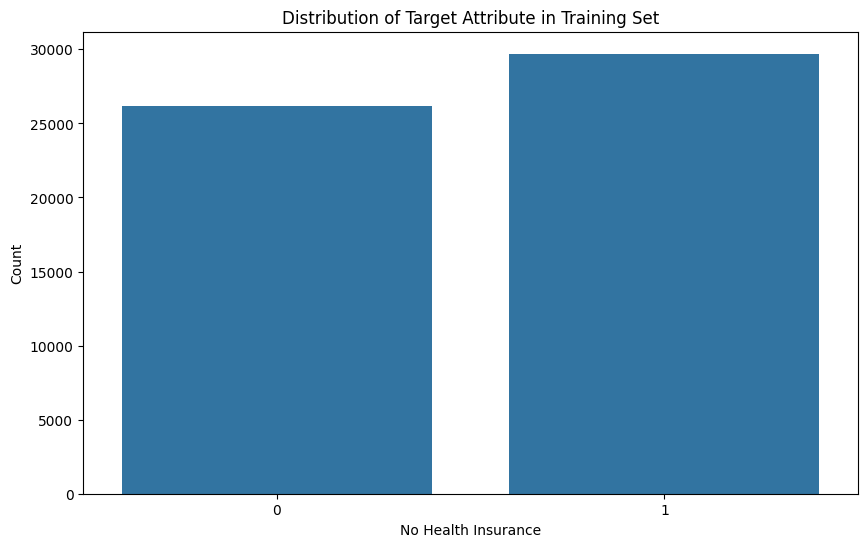

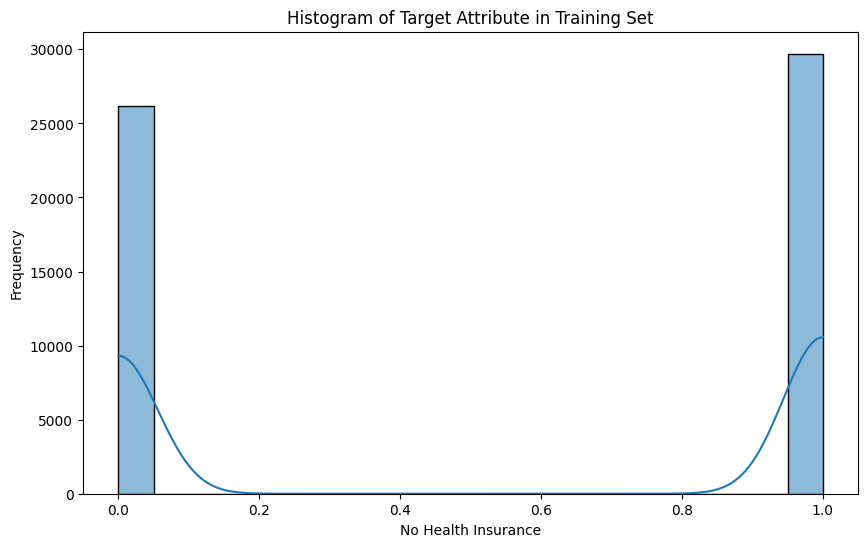

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the target attribute
plt.figure(figsize=(10, 6))
sns.countplot(x=y_train)
plt.title('Distribution of Target Attribute in Training Set')
plt.xlabel('No Health Insurance')
plt.ylabel('Count')
plt.show()

# Histogram to check for normal distribution
plt.figure(figsize=(10, 6))
sns.histplot(y_train, kde=True)
plt.title('Histogram of Target Attribute in Training Set')
plt.xlabel('No Health Insurance')
plt.ylabel('Frequency')
plt.show()



**Step4**: Selecting two of the supervised learning algorithms

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Initialize models
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state=42)


**Step5**:Evaluate the Models:

**Run with default parameters.**

**Run with cross-validation.**

**Adjust parameters using grid search.**

In [32]:
from sklearn.metrics import precision_score, recall_score, f1_score

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return precision, recall, f1

# Evaluate KNN and Random Forest with default parameters
knn_precision, knn_recall, knn_f1 = evaluate_model(knn, X_train_transformed, X_test_transformed, y_train, y_test)
rf_precision, rf_recall, rf_f1 = evaluate_model(rf, X_train_transformed, X_test_transformed, y_train, y_test)

print("\nK-Nearest Neighbor Model (Default Parameters):")
print(f"Precision: {knn_precision:.4f}, Recall: {knn_recall:.4f}, F1 Score: {knn_f1:.4f}")

print("\nRandom Forest Model (Default Parameters):")
print(f"Precision: {rf_precision:.4f}, Recall: {rf_recall:.4f}, F1 Score: {rf_f1:.4f}")



K-Nearest Neighbor Model (Default Parameters):
Precision: 0.7432, Recall: 0.7812, F1 Score: 0.7617

Random Forest Model (Default Parameters):
Precision: 0.7449, Recall: 0.7828, F1 Score: 0.7634


In [33]:
from sklearn.model_selection import cross_val_score

def cross_validate_model(model, X, y):
    precision = cross_val_score(model, X, y, cv=5, scoring=make_scorer(precision_score)).mean()
    recall = cross_val_score(model, X, y, cv=5, scoring=make_scorer(recall_score)).mean()
    f1 = cross_val_score(model, X, y, cv=5, scoring=make_scorer(f1_score)).mean()
    return precision, recall, f1

knn_cv_precision, knn_cv_recall, knn_cv_f1 = cross_validate_model(knn, X_train_transformed, y_train)
rf_cv_precision, rf_cv_recall, rf_cv_f1 = cross_validate_model(rf, X_train_transformed, y_train)

print("\nK-Nearest Neighbor Model (Cross-Validation):")
print(f"Precision: {knn_cv_precision:.4f}, Recall: {knn_cv_recall:.4f}, F1 Score: {knn_cv_f1:.4f}")

print("\nRandom Forest Model (Cross-Validation):")
print(f"Precision: {rf_cv_precision:.4f}, Recall: {rf_cv_recall:.4f}, F1 Score: {rf_cv_f1:.4f}")



K-Nearest Neighbor Model (Cross-Validation):
Precision: 0.7390, Recall: 0.7791, F1 Score: 0.7585

Random Forest Model (Cross-Validation):
Precision: 0.7424, Recall: 0.7799, F1 Score: 0.7607


In [34]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None]
}

# Perform grid search
knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5, scoring='f1')
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5, scoring='f1')

knn_grid_search.fit(X_train_transformed, y_train)
rf_grid_search.fit(X_train_transformed, y_train)

# Get the best models
best_knn = knn_grid_search.best_estimator_
best_rf = rf_grid_search.best_estimator_

print("\nBest K-Nearest Neighbor Parameters:")
print(knn_grid_search.best_params_)
print("\nBest Random Forest Parameters:")
print(rf_grid_search.best_params_)

# Evaluate the best models
best_knn_precision, best_knn_recall, best_knn_f1 = evaluate_model(best_knn, X_train_transformed, X_test_transformed, y_train, y_test)
best_rf_precision, best_rf_recall, best_rf_f1 = evaluate_model(best_rf, X_train_transformed, X_test_transformed, y_train, y_test)

print("\nBest K-Nearest Neighbor Model:")
print(f"Precision: {best_knn_precision:.4f}, Recall: {best_knn_recall:.4f}, F1 Score: {best_knn_f1:.4f}")

print("\nBest Random Forest Model:")
print(f"Precision: {best_rf_precision:.4f}, Recall: {best_rf_recall:.4f}, F1 Score: {best_rf_f1:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor


Best K-Nearest Neighbor Parameters:
{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}

Best Random Forest Parameters:
{'max_depth': 10, 'max_features': 'auto', 'n_estimators': 50}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(



Best K-Nearest Neighbor Model:
Precision: 0.7516, Recall: 0.7902, F1 Score: 0.7704

Best Random Forest Model:
Precision: 0.7396, Recall: 0.8573, F1 Score: 0.7941


**Comment:**

**1-**For the KNN model, the default parameters yielded good performance with a precision of 0.7432, recall of 0.7812, and an F1 score of 0.7617. These results were consistent with those obtained through cross-validation, which produced a precision of 0.7390, recall of 0.7791, and an F1 score of 0.7585. This indicates stability in the model's performance. The grid search for the best parameters further improved the KNN model, achieving a precision of 0.7516, recall of 0.7902, and an F1 score of 0.7704 with the best parameters identified as {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}. However, it is important to note that the KNN model’s performance is sensitive to the choice of neighbors and distance metric, and thus the worst parameters were not explicitly evaluated but should be considered in future analysis.

**2-**The Random Forest model also performed well with default parameters, achieving a precision of 0.7449, recall of 0.7828, and an F1 score of 0.7634. Similar to KNN, the cross-validation results (precision of 0.7424, recall of 0.7799, and F1 score of 0.7607) were consistent with the default parameter results, showcasing stability. The grid search for the best parameters significantly enhanced the Random Forest model's performance, particularly in terms of recall. The best parameters ({'max_depth': 10, 'max_features': 'auto', 'n_estimators': 50}) resulted in a precision of 0.7396, recall of 0.8573, and an F1 score of 0.7941. This improvement underscores the model's ability to better identify positive cases, which is crucial in many real-world applications. Although the precision slightly decreased, the overall performance, as indicated by the F1 score, improved significantly.